# Dataset 1 

In [3]:
from pymongo import MongoClient, collection
import requests
from bs4 import BeautifulSoup

import pandas as pd

from urllib.request import urlopen as ureq
import re
import json
import logging
import threading

### Setting MongoDB parameters

In [3]:
client = MongoClient()
my_key = "AnqLqo5TT9JDfzfqKrDUEYUqJ6HWZJy8"
base = "https://api.mlab.com/api/1"
url_db = base + "/databases?apiKey=" + my_key
response = requests.get(url_db)
databases = json.loads(response.text)
adm_database = databases[0]
adm_database

'adm_hm4'

In [4]:
# Set structure for database
headers = {'content-type':'application/json'}

We manually created the collection 'flats' in the "adm_hm4" database (MongoDB)

In [5]:
collection = 'flats'
col_url = base + '/databases/' + adm_database + "/collections/" + collection +'/?apiKey=' + my_key

# Pushing data into database
# payload = json.dumps(flat_data)
# response = requests.post(col_url, data=payload, headers=headers)

Now, we extract the interesting data from websites and push into our database

In [109]:
def thread_find_links(nr_listing_page):
    """
    This function is collecting all interesting links from the given url.
    Input: the number of the listing page (Integer Type) 
    Output: list with collected links
    """
    content = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag="+str(nr_listing_page))
    soup = BeautifulSoup(content.text, 'html.parser')
    
    for link in soup.find_all('a', href=True):
        url = link['href']
        #url.startswith('http://www.immobiliare.it/') or https
        if url.endswith('.html'):
            link_threads.append(url)
    return

In [102]:
import time

link_threads = []
for nr_page in range(1, 1000):
    t = threading.Thread(target=thread_find_links, args=("nr_page",))
    t.start()
    time.sleep(1)

In [104]:
len(link_threads)
link_threads[:10]

['http://www.immobiliare.it/70535496-Vendita-Appartamento-via-Appia-Nuova-Roma.html',
 'http://www.immobiliare.it/70539776-Vendita-Quadrilocale-via-della-Camilluccia-589-Roma.html',
 'http://www.immobiliare.it/70533198-Vendita-Bilocale-via-etruria-Roma.html',
 'http://www.immobiliare.it/70534628-Vendita-Bilocale-via-corigliano-calabro-Roma.html',
 'http://www.immobiliare.it/70537232-Vendita-Trilocale-via-Bonaventura-Cerretti-13-Roma.html',
 'http://www.immobiliare.it/70531398-Vendita-Quadrilocale-via-Antonio-Pisano-16-Roma.html',
 'http://www.immobiliare.it/70541184-Vendita-Trilocale-via-delle-Spighe-Roma.html',
 'http://www.immobiliare.it/70539496-Vendita-Villetta-a-schiera-via-Merano-Roma.html',
 'http://www.immobiliare.it/70540226-Vendita-Quadrilocale-via-Pietro-Castrucci-Roma.html',
 'http://www.immobiliare.it/70537710-Vendita-Trilocale-via-Gennaro-Righelli-58-Roma.html']

In [108]:
with open("links.txt", "w") as link_file:
    for url_ in link_threads:
        link_file.write(url_ + "\n")

In [37]:
def threadExtract(url):
    """
    This function is getting html content, scrapping data and saving it into our database.
    Input: String: "url" 
    """
#     logging.info('extracting' + url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    scrapped_data = scrap_data(soup) #output should be a dictionary
    
#     collection = 'flats'
#     col_url = base + '/databases/' + adm_database + "/collections/" + collection +'/?apiKey=' + my_key
    print(scrapped_data)
    # Pushing data into database
#     payload = json.dumps(scrapped_data)
#     response = requests.post(col_url, data=payload, headers=headers)

#     logging.info("Done extracting")

#### Thread-based parallelism :

In [72]:
links=[] # list with links used while retrieving data
import time

import datetime
start = datetime.datetime.now()

stop = False
i = 1 
# count = 0
for i in range(1, 10):
    # Loading the initial web-page
    content = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag="+str(i))
    soup = BeautifulSoup(content.text, 'html.parser')
    
    # Scrapping data from each link from the initial website until we get 10000 links
    for link in soup.find_all('a', href=True):
        url = link['href']
        if url in links: continue
        if url.startswith('https://www.immobiliare.it/') and url.endswith('.html'):
            print(url)
            links.append(url)
#             try:
#                 threading.Thread(threadExtract(url)).start()
# #                 time.sleep(5) #for non-blocking
#                 links.append(url)
#                 count += 1
#                 if count >= 10000: stop = True
#             except: continue
#     i += 1
    
print(datetime.datetime.now())
print(datetime.datetime.now() - start)

https://www.immobiliare.it/53131931-Vendita-Bilocale-viale-Italo-Calvino-Roma.html
https://www.immobiliare.it/70085670-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/70100018-Vendita-Quadrilocale-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/70084602-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/70085950-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-Roma.html
https://www.immobiliare.it/70086882-Vendita-Appartamento-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/70085240-Vendita-Trilocale-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/53973750-Vendita-Trilocale-via-Maso-Finiguerra-27C-D-Roma.html
https://www.immobiliare.it/70100304-Vendita-Attico-Mansarda-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/70082804-Vendita-Bilocale-piazza-San-Giovanni-di-Dio-39-Roma.html
https://www.immobiliare.it/62331304-Vendita-Bilocale-nuovo-primo-pia

https://www.immobiliare.it/67012733-Vendita-Attico-Mansarda-via-della-Frezza-Roma.html
https://www.immobiliare.it/69489852-Vendita-Villa-via-Antonio-Fogazzaro-Roma.html
https://www.immobiliare.it/68192795-Vendita-Attico-Mansarda-largo-Arturo-Donaggio-Roma.html
https://www.immobiliare.it/66890473-Vendita-Appartamento-via-Margutta-Roma.html
https://www.immobiliare.it/60582078-Vendita-Bilocale-via-Dei-Banchi-Nuovi-Roma.html
https://www.immobiliare.it/66479763-Vendita-Appartamento-via-Sesto-Rufo-42-Roma.html
https://www.immobiliare.it/68085925-Vendita-Trilocale-via-Zaccanopoli-Roma.html
https://www.immobiliare.it/67531639-Vendita-Attico-Mansarda-via-Bartolomeo-Dusi-18-Roma.html
https://www.immobiliare.it/66815893-Vendita-Villa-via-Saturnia-Roma.html
https://www.immobiliare.it/54201768-Vendita-Villa-via-Tommaso-Traetta-Roma.html
https://www.immobiliare.it/70343364-Vendita-Trilocale-viale-della-Venezia-Giulia-50-Roma.html
https://www.immobiliare.it/69292298-Vendita-Appartamento-via-della-Far

https://www.immobiliare.it/68210745-Vendita-Bilocale-via-Guido-Castelnuovo-Roma.html
https://www.immobiliare.it/66028417-Vendita-Appartamento-via-Nizza-Roma.html
https://www.immobiliare.it/69907978-Vendita-Appartamento-via-Onofrio-Panvinio-Roma.html
https://www.immobiliare.it/65795373-Vendita-Appartamento-via-Gregorio-VII-396-Roma.html
https://www.immobiliare.it/69259598-Vendita-Appartamento-via-Archimede-Roma.html
https://www.immobiliare.it/68310553-Vendita-Bilocale-via-Antonio-Pacinotti-Roma.html
https://www.immobiliare.it/65613957-Vendita-Villa-via-Tommaso-Traetta-Roma.html
https://www.immobiliare.it/64239788-Vendita-Villetta-a-schiera-via-della-Muratella-39-Roma.html
https://www.immobiliare.it/68630153-Vendita-Appartamento-via-Emilio-Faa-di-Bruno-Roma.html
https://www.immobiliare.it/63029334-Vendita-Appartamento-via-Gibilmanna-Roma.html
https://www.immobiliare.it/70256058-Vendita-Appartamento-via-Francesco-Ferrara-36-Roma.html
https://www.immobiliare.it/64401856-Vendita-Appartament

In [12]:
len(links)

8372

In [2]:
# display what is inside the database
response = requests.get(col_url)
result = json.loads(response.text)
# result

NameError: name 'requests' is not defined

In [1]:
import numpy as np

# Convert data into matrix
dataset1 = np.matrix(list(map(lambda x:list(x.values())[1:], result)))

NameError: name 'result' is not defined

## THe clustering part

In [4]:
data_frame = pd.read_csv("flat_data.txt")
inf_dataset = data_frame[["price", "locali", "superficie", "bagni", "piano"]]
inf_dataset.head()

,price,locali,superficie,bagni,piano
0,1260000,5,225,2,4
1,245000,2,80,1,2
2,319000,3,114,1,1
3,630000,4,153,2,5
4,157000,3,68,1,1


In [7]:
sample_inf_dataset = inf_dataset[:50]

In [19]:
description_data_frame = pd.read_csv("description_matrix.csv")

In [16]:
sample_description_data_frame = description_data_frame[:50]

In [41]:
sample_description_data_frame = sample_description_data_frame.drop(columns = ["Ann_index"])

**K-MEANS ++ **

In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

**sample_inf_dataset**

In [27]:
sse = {}
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k, max_iter=1000).fit(sample_inf_dataset)
    sample_inf_dataset['clusters'] = kmeanModel.labels_
    sse[k] = kmeanModel.inertia_ 

c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

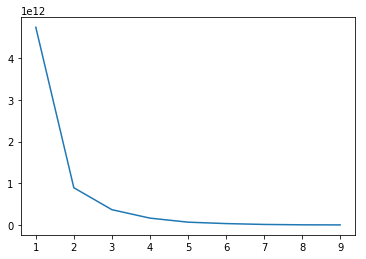

In [28]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel = "k - Number of clusters "  # Why we do not have titles? 
plt.ylabel = "SSE (Inertia)"
plt.title = "Plot of SSE for kmeans clustering"
plt.show()

According to the plot, we think that the best number of clusters can be 5.

In [33]:
kmeanModel = KMeans(n_clusters=3, max_iter=1000).fit(sample_inf_dataset)
sample_inf_dataset['information_clusters'] = kmeanModel.labels_

c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
sample_inf_dataset.head()

,price,locali,superficie,bagni,piano,clusters,information_clusters
0,1260000,5,225,2,4,2,2
1,245000,2,80,1,2,6,0
2,319000,3,114,1,1,5,0
3,630000,4,153,2,5,4,1
4,157000,3,68,1,1,3,0


**sample_description_data_frame**

In [42]:
sse = {}
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k, max_iter=1000).fit(sample_description_data_frame)
    sample_description_data_frame['clusters'] = kmeanModel.labels_
    sse[k] = kmeanModel.inertia_ 

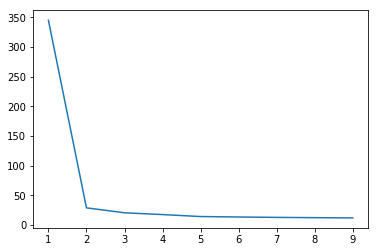

In [43]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel = "k - Number of clusters "  # Why we do not have titles? 
plt.ylabel = "SSE (Inertia)"
plt.title = "Plot of SSE for kmeans clustering"
plt.show()

In [46]:
kmeanModel = KMeans(n_clusters=2, max_iter=1000).fit(sample_description_data_frame)
sample_description_data_frame['information_clusters'] = kmeanModel.labels_

In [47]:
sample_description_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,755,756,757,758,759,760,761,762,clusters,information_clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,...,0.0,0.0,0.0,-0.0538,0.00000,0.0,0.0,0.00000,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,...,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,8,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,-0.0538,0.0000,...,0.0,0.0,0.0,0.0000,-0.04501,0.0,0.0,0.00000,8,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04501,-0.0538,-0.0561,...,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,8,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,...,0.0,0.0,0.0,-0.0538,0.00000,0.0,0.0,-0.04501,8,1


#### Test for JAccard Similarity

sample_inf_dataset

In [75]:
# TODO: change the dtype to 'int32'
clusters = 3
groups_dict_ds1 = {}
for cluster_ in range(clusters):
    # TODO: covert to simple list !
    groups_dict_ds1[cluster_] = set(sample_inf_dataset.groupby(by = "information_clusters").get_group(cluster_).index)

In [76]:
clusters = 2
groups_dict_ds2 = {}
for cluster_ in range(clusters):
    # TODO: covert to simple list !
    groups_dict_ds2[cluster_] = set(sample_description_data_frame.groupby(by = "information_clusters").get_group(cluster_).index)

In [94]:
def jaccard_similarity(set1, set2):
    return round(len(set1.intersection(set2))/len(set1.union(set2)), 4)

In [96]:
jaccard_sim = jaccard_similarity(groups_dict_ds1[1], groups_dict_ds2[1])
jaccard_sim

0.1304

In [124]:
# values or just indexes ???
jaccard_scores = [(jaccard_similarity(clu1, clu2), nr1, nr2) for nr1, clu1 in groups_dict_ds1.items() for nr2, clu2 in groups_dict_ds2.items()]
jaccard_scores = sorted(jaccard_scores)
best_3 = sorted(jaccard_scores[-3:])

print("TOP 3 COUPLES: \nInf_cluster | Desc_cluster| Jaccard_Similarity")
for i in best_3:
    print(" {0:10} |  {1:10} | {2:18}".format(i[1], i[2], i[0]))

TOP 3 COUPLES: 
Inf_cluster | Desc_cluster| Jaccard_Similarity
          1 |           0 |             0.1667
          0 |           1 |             0.3095
          0 |           0 |             0.5435


**Wordclouds**

In [133]:
from wordcloud import WordCloud

In [136]:
tfid_df = pd.read_csv("tfid.csv", header=None)
tfid_df

,0
0,0\t36\t62\t465\t689\t414\t105\t122\t702\t170\t...
1,1\t420\t632\t689\t414\t27\t465\t348\t680\t551\...
2,2\t105\t122\t182\t82\t68\t602\t751\t172\t161\t...
3,3\t420\t12\t143\t266\t466\t685\t648\t574\t384\...
4,4\t105\t122\t68\t361\t465\t416\t36\t739\t508\t...
5,5\t650\t561\t268\t666\t572\t12\t182\t243\t688\...
6,6\t610\t691\t465\t490\t75\t103\t542\t162\t450\...
7,7\t420\t259\t395\t465\t580\t721\t105\t561\t172...
8,8\t465\t162\t412\t614\t183\t313\t108\t105\t122...
9,9\t420\t678\t619\t272\t250\t518\t239\t172\t576...


In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("img/first_review.png")
